<a href="https://colab.research.google.com/github/tahsinac/other-projects/blob/master/renewable_energy_generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

A key goal of smart grid initiatives is significantly increasing the fraction of grid energy contributed by renewables. One challenge with integrating renewables into the grid is that their power generation is intermittent and uncontrollable. Thus, predicting future renewable generation is important, since the grid must dispatch generators to satisfy demand as generation varies. While manually developing sophisticated prediction models may be feasible for large-scale solar farms, developing them for distributed generation at millions of homes throughout the grid is a challenging problem. Thus, to address this problem, in this project a machine learning model will be built and trained on weather data that will be able to predict solar and wind energy generations.


# The Data

The data I used in this analysis comes from [Open Power System Data](https://open-power-system-data.org/), a free-of-charge platform with data data on installed generation capacity by country/technology, individual power plants (conventional and renewable), and time series data. 

The platform has made such data for 37 European countries available, however, in this project, only data for Germany will be used. 

The two datasets used here:


1.   Energy Production Data : Time series with load, wind and solar, prices in hourly resolution. The dataset and the data dictionary can be found [here](https://data.open-power-system-data.org/time_series/).

2.   Weather Data : Weather data with wind speed, radiation, temperature and other measurements. Given the huge amount of data, the Open Power System Data platform provides a CSV file for the German dataset for 2016 and a script to download the data for other countries and years.

>> * The full weather dataset and data dictionary for 37 European countries can be found [here](https://data.open-power-system-data.org/weather_data/).
>> * The weather dataset for Germany (2016) and data dictionary can be found [here](https://data.open-power-system-data.org/weather_data/2017-07-05).










## Loading The Data

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


Here, we will be reading in the file containing the energy production data for Germany. To do this, we will read the column containing the timestamp (whose column name starts with 'utc') and the columns containing German data (whose columns start with 'DE').

In [0]:
engen = pd.read_csv('gdrive/My Drive/Colab Notebooks/Colab Data/time_series_60min_singleindex.csv',
                        usecols=(lambda s: s.startswith('utc') | s.startswith('DE')),
                        parse_dates=[0], index_col=0)

In [4]:
engen.head(3)

,DE_load_entsoe_power_statistics,DE_load_entsoe_transparency,DE_price_day_ahead,DE_solar_capacity,DE_solar_generation_actual,DE_solar_profile,DE_wind_capacity,DE_wind_generation_actual,DE_wind_profile,DE_wind_offshore_capacity,...,DE_tennet_solar_generation_forecast,DE_tennet_wind_generation_actual,DE_tennet_wind_generation_forecast,DE_tennet_wind_offshore_generation_actual,DE_tennet_wind_onshore_generation_actual,DE_transnetbw_solar_generation_actual,DE_transnetbw_solar_generation_forecast,DE_transnetbw_wind_generation_actual,DE_transnetbw_wind_generation_forecast,DE_transnetbw_wind_onshore_generation_actual
utc_timestamp,,,,,,,,,,,,,,,,,,,,,
2005-12-31 23:00:00,47823.0,NaN,32.10,2028.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1707.0,1864.0,0.0,1707.0,NaN,NaN,NaN,NaN,NaN
2006-01-01 00:00:00,47823.0,NaN,30.07,2028.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1755.0,1813.0,0.0,1755.0,NaN,NaN,NaN,NaN,NaN
2006-01-01 01:00:00,43444.0,NaN,27.94,2028.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1591.0,1726.0,0.0,1591.0,NaN,NaN,NaN,NaN,NaN


In [0]:
# filtering out records for 2016
engen = engen.loc[engen.index.year == 2016, :]

In [6]:
engen.head(3)

,DE_load_entsoe_power_statistics,DE_load_entsoe_transparency,DE_price_day_ahead,DE_solar_capacity,DE_solar_generation_actual,DE_solar_profile,DE_wind_capacity,DE_wind_generation_actual,DE_wind_profile,DE_wind_offshore_capacity,...,DE_tennet_solar_generation_forecast,DE_tennet_wind_generation_actual,DE_tennet_wind_generation_forecast,DE_tennet_wind_offshore_generation_actual,DE_tennet_wind_onshore_generation_actual,DE_transnetbw_solar_generation_actual,DE_transnetbw_solar_generation_forecast,DE_transnetbw_wind_generation_actual,DE_transnetbw_wind_generation_forecast,DE_transnetbw_wind_onshore_generation_actual
utc_timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,41913.0,39396.0,22.39,39021.0,0.0,0.0,44325.0,8579.0,0.1936,3283.0,...,0.0,5615.0,4740.0,2263.0,3352.0,0.0,0.0,24.0,0.0,24.0
2016-01-01 01:00:00,40331.0,37718.0,20.59,39021.0,0.0,0.0,44325.0,8542.0,0.1928,3283.0,...,0.0,5498.0,4735.0,2218.0,3280.0,0.0,0.0,24.0,0.0,24.0
2016-01-01 02:00:00,39162.0,36692.0,16.81,39021.0,0.0,0.0,44325.0,8443.0,0.1905,3283.0,...,0.0,5439.0,4795.0,2005.0,3434.0,0.0,0.0,17.0,0.0,17.0


In [7]:
engen.isnull().sum()

DE_load_entsoe_power_statistics                 0
DE_load_entsoe_transparency                     0
DE_price_day_ahead                              0
DE_solar_capacity                               0
DE_solar_generation_actual                      0
DE_solar_profile                                0
DE_wind_capacity                                0
DE_wind_generation_actual                       0
DE_wind_profile                                 0
DE_wind_offshore_capacity                       0
DE_wind_offshore_generation_actual              0
DE_wind_offshore_profile                        0
DE_wind_onshore_capacity                        0
DE_wind_onshore_generation_actual               0
DE_wind_onshore_profile                         0
DE_50hertz_solar_generation_actual              0
DE_50hertz_solar_generation_forecast            0
DE_50hertz_wind_generation_actual               0
DE_50hertz_wind_generation_forecast             0
DE_50hertz_wind_offshore_generation_actual      0


In [8]:
engen.shape

(8784, 40)

The energy dataset has 40columns, but for the purposes of this project, we are *mainly* interested in:
* **DE_solar_generation_actual** : the actual solar generation in MW
* **DE_wind_generation_actual** :  the actual wind generation in MW

In [0]:
weather = pd.read_csv('gdrive/My Drive/Colab Notebooks/Colab Data/weather_data_GER_2016.csv',
                     parse_dates=[0], index_col=0)

In [10]:
weather.head(3)

,cumulated hours,lat,lon,v1,v2,v_50m,h1,h2,z0,SWTDN,SWGDN,T,rho,p
timestamp,,,,,,,,,,,,,,
2016-01-01 00:00:00,0,47.5,5.625,0.81,1.88,3.36,2,10,0.052526,0.0,0.0,277.350159,1.236413,99282.710938
2016-01-01 01:00:00,1,47.5,5.625,0.77,1.61,2.63,2,10,0.052510,0.0,0.0,277.025665,1.239390,99300.164062
2016-01-01 02:00:00,2,47.5,5.625,0.66,1.22,1.89,2,10,0.052495,0.0,0.0,277.223755,1.243861,99310.992188


In [11]:
weather.tail(3)

,cumulated hours,lat,lon,v1,v2,v_50m,h1,h2,z0,SWTDN,SWGDN,T,rho,p
timestamp,,,,,,,,,,,,,,
2016-12-31 21:00:00,8781,55.0,15.0,10.49,12.65,14.38,2,10,0.001014,0.0,0.0,278.634644,1.270996,101653.398438
2016-12-31 22:00:00,8782,55.0,15.0,10.47,12.63,14.41,2,10,0.001009,0.0,0.0,278.678162,1.270252,101609.484375
2016-12-31 23:00:00,8783,55.0,15.0,10.39,12.53,14.33,2,10,0.000993,0.0,0.0,278.720184,1.269202,101545.859375


In [12]:
weather.shape

(2248704, 14)

In [13]:
weather.isnull().sum()

cumulated hours    0
lat                0
lon                0
v1                 0
v2                 0
v_50m              0
h1                 0
h2                 0
z0                 0
SWTDN              0
SWGDN              0
T                  0
rho                0
p                  0
dtype: int64

The weather dataset contains the following features:

* Wind Parameters
> * v1: velocity [m/s] @ height h1 (2 meters above displacement height)
> * v2: velocity [m/s] @ height h2 (10 meters above displacement height)
> * v_50m: velocity [m/s] @ 50 meters above ground
> * h1: height above ground [m] (h1 = displacement height +2m)
> * h2: height above ground [m] (h2 = displacement height +10m)
> * z0: roughness length [m]
* Solar Parameters:
> * SWTDN: total top-of-the-atmosphere horizontal radiation [W/m²]
> * SWGDN: total ground horizontal radiation [W/m²]
* Temperature Parameters
> * T: Temperature [K] @ 2 meters above displacement height (see h1)
* Air Parameters
> * Rho: air density [kg/m³] @ surface
> * p: air pressure [Pa] @ surface

The data is given by chuncks of the German geographical territory, each determined by its latitute ('lat') and longitute ('lon'). Each chunck corresponds to the resolution of the MERRA-2 grid (which was used to obtain the data), which is 0.5º x 0.625º.

In [14]:
weather.loc[weather.index == '2016-01-01 00:00:00', :]

,cumulated hours,lat,lon,v1,v2,v_50m,h1,h2,z0,SWTDN,SWGDN,T,rho,p
timestamp,,,,,,,,,,,,,,
2016-01-01,0,47.5,5.625,0.81,1.88,3.36,2,10,0.052526,0.0,0.0,277.350159,1.236413,99282.710938
2016-01-01,0,47.5,6.250,0.85,1.77,3.69,2,10,0.163823,0.0,0.0,277.609924,1.226037,98194.710938
2016-01-01,0,47.5,6.875,0.94,1.94,3.79,3,11,0.286626,0.0,0.0,276.850159,1.205101,96186.710938
2016-01-01,0,47.5,7.500,0.84,1.68,2.82,2,10,0.109472,0.0,0.0,276.414612,1.200341,95874.710938
2016-01-01,0,47.5,8.125,0.74,1.56,2.51,2,10,0.066503,0.0,0.0,276.039612,1.202233,96050.710938
2016-01-01,0,47.5,8.750,0.76,1.49,2.37,2,10,0.051061,0.0,0.0,275.898987,1.201012,95842.710938
2016-01-01,0,47.5,9.375,0.75,1.27,1.83,2,10,0.082921,0.0,0.0,275.578674,1.181908,94178.710938
2016-01-01,0,47.5,10.000,0.88,1.59,2.32,4,12,0.398931,0.0,0.0,274.123596,1.146264,90998.710938
2016-01-01,0,47.5,10.625,0.81,1.38,1.93,6,14,0.813970,0.0,0.0,273.670471,1.117516,88518.710938


For any given hour, we have data for 256 'chuncks' of data. Dividing the total number of entries by the number of 'chuncks' returns the expected number of hours of a leap year.

In [0]:
# combining all chunks
weather_comb = weather.groupby(weather.index).mean()

In [16]:
weather_comb.head(5)

,cumulated hours,lat,lon,v1,v2,v_50m,h1,h2,z0,SWTDN,SWGDN,T,rho,p
timestamp,,,,,,,,,,,,,,
2016-01-01 00:00:00,0.0,51.25,10.3125,2.616758,3.714414,5.132500,2.546875,10.546875,0.164370,0.0,0.0,275.296747,1.253185,99281.007812
2016-01-01 01:00:00,1.0,51.25,10.3125,2.564375,3.631055,4.976094,2.546875,10.546875,0.164331,0.0,0.0,275.255473,1.253778,99288.492188
2016-01-01 02:00:00,2.0,51.25,10.3125,2.480859,3.516328,4.794688,2.546875,10.546875,0.164288,0.0,0.0,275.217089,1.254304,99296.398438
2016-01-01 03:00:00,3.0,51.25,10.3125,2.397148,3.404961,4.664023,2.546875,10.546875,0.164239,0.0,0.0,275.211715,1.254562,99306.695312
2016-01-01 04:00:00,4.0,51.25,10.3125,2.305703,3.286602,4.566289,2.546875,10.546875,0.164199,0.0,0.0,275.193369,1.254733,99319.750000


In [0]:
# merging the dataframes
df = pd.merge(engen, weather_comb, how = 'left',  left_index = True, right_index = True)

In [18]:
df.head(3)

,DE_load_entsoe_power_statistics,DE_load_entsoe_transparency,DE_price_day_ahead,DE_solar_capacity,DE_solar_generation_actual,DE_solar_profile,DE_wind_capacity,DE_wind_generation_actual,DE_wind_profile,DE_wind_offshore_capacity,...,v2,v_50m,h1,h2,z0,SWTDN,SWGDN,T,rho,p
utc_timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,41913.0,39396.0,22.39,39021.0,0.0,0.0,44325.0,8579.0,0.1936,3283.0,...,3.714414,5.132500,2.546875,10.546875,0.164370,0.0,0.0,275.296747,1.253185,99281.007812
2016-01-01 01:00:00,40331.0,37718.0,20.59,39021.0,0.0,0.0,44325.0,8542.0,0.1928,3283.0,...,3.631055,4.976094,2.546875,10.546875,0.164331,0.0,0.0,275.255473,1.253778,99288.492188
2016-01-01 02:00:00,39162.0,36692.0,16.81,39021.0,0.0,0.0,44325.0,8443.0,0.1905,3283.0,...,3.516328,4.794688,2.546875,10.546875,0.164288,0.0,0.0,275.217089,1.254304,99296.398438


# Exploratory Data Analysis

## Energy Generation Data

### Wind

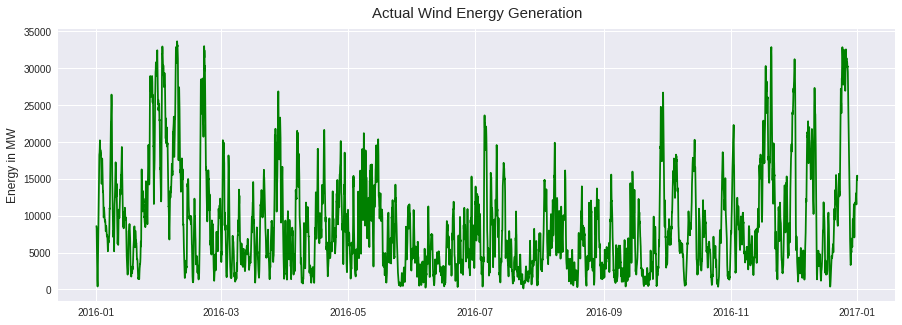

In [19]:
plt.figure(figsize = (15,5))
plt.plot(df.index, df['DE_wind_generation_actual'], color = 'green')
plt.title('Actual Wind Energy Generation', fontsize = 15, y = 1.02)
plt.ylabel('Energy in MW', fontsize = 12)
plt.show()

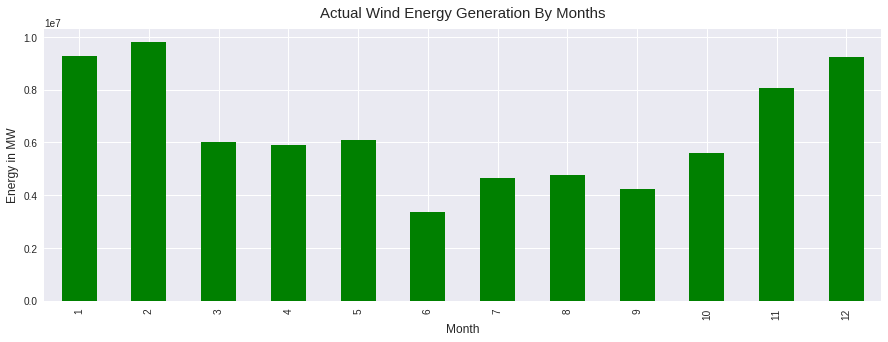

In [20]:
df['DE_wind_generation_actual'].groupby(df.index.month).sum().plot(kind = 'bar', color = 'green', figsize = (15,5))
plt.title('Actual Wind Energy Generation By Months', fontsize = 15, y = 1.02)
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Energy in MW', fontsize = 12)
plt.show()

Energy generation by wind is considerably lower between March and October, with the lowest in June.

### Solar

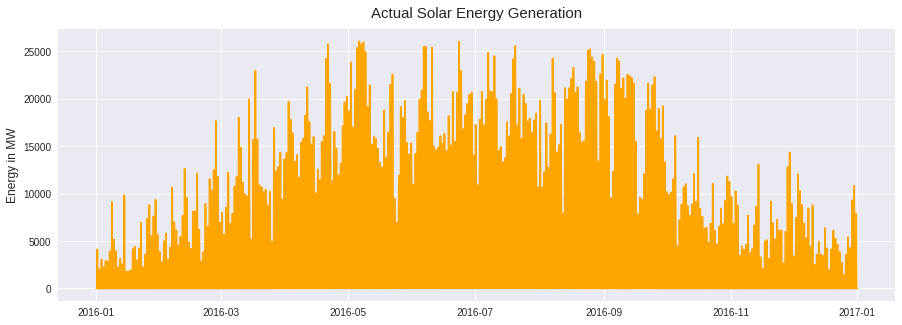

In [21]:
plt.figure(figsize = (15,5))
plt.plot(df.index, df['DE_solar_generation_actual'], color = 'orange')
plt.title('Actual Solar Energy Generation', fontsize = 15, y = 1.02)
plt.ylabel('Energy in MW', fontsize = 12)
plt.show()

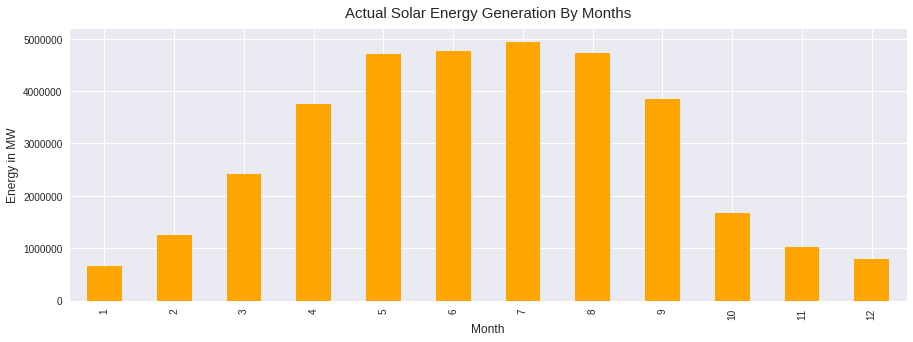

In [22]:
df['DE_solar_generation_actual'].groupby(df.index.month).sum().plot(kind = 'bar', color = 'orange', figsize = (15,5))
plt.title('Actual Solar Energy Generation By Months', fontsize = 15, y = 1.02)
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Energy in MW', fontsize = 12)
plt.show()

Solar energy generation is highest in middle of the year, ie summer time and very low during winter.

## Weather Data

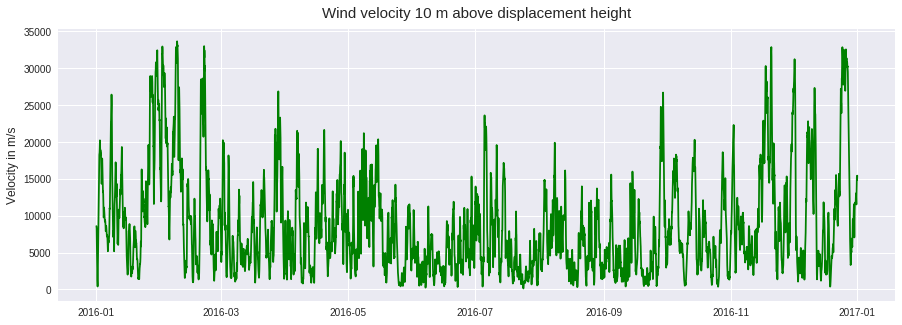

In [23]:
plt.figure(figsize = (15,5))
plt.plot(df.index, df['DE_wind_generation_actual'], color = 'green')
plt.title('Wind velocity 10 m above displacement height', fontsize = 15, y = 1.02)
plt.ylabel('Velocity in m/s', fontsize = 12)
plt.show()

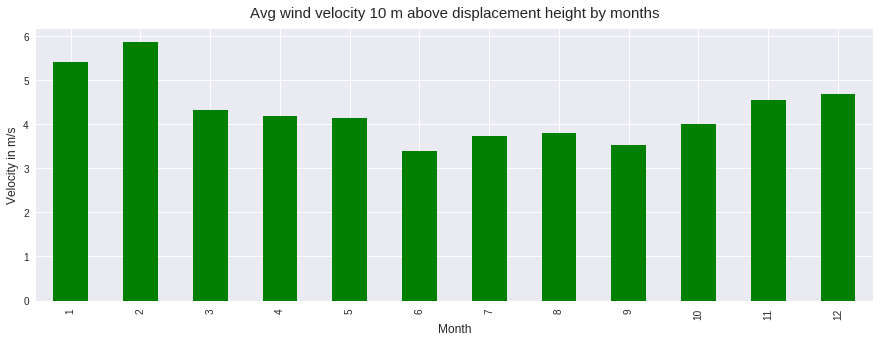

In [24]:
df['v2'].groupby(df.index.month).mean().plot(kind = 'bar', color = 'green', figsize = (15,5))
plt.title('Avg wind velocity 10 m above displacement height by months', fontsize = 15, y = 1.02)
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Velocity in m/s', fontsize = 12)
plt.show()

As expected, the trend in the wind velocity corresponds to that for actual wind energy generation.

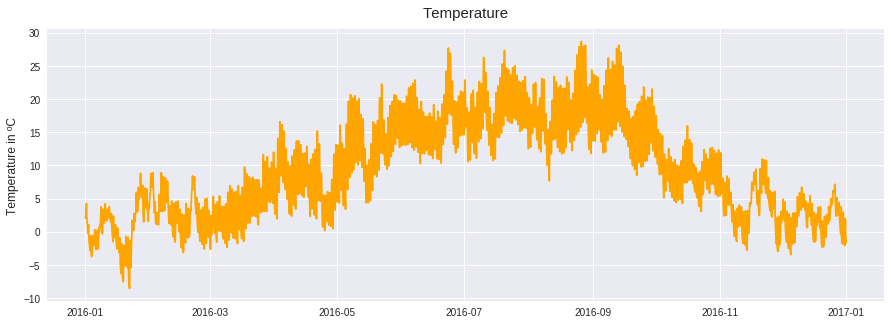

In [25]:
plt.figure(figsize = (15,5))
plt.plot(df.index, df['T'] - 273.15, color = 'orange')
plt.title('Temperature', fontsize = 15, y = 1.02)
plt.ylabel('Temperature in ºC', fontsize = 12)
plt.show()

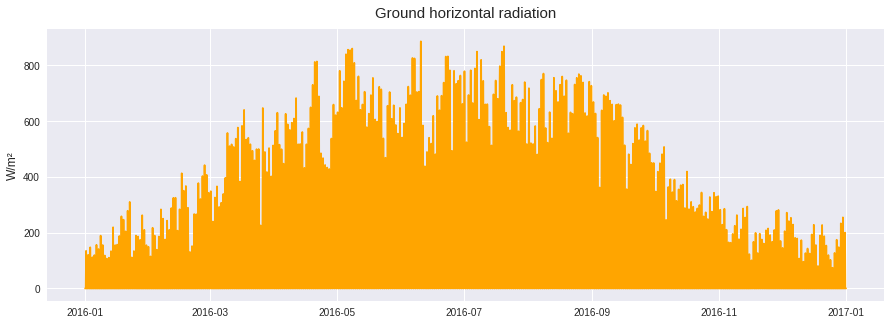

In [26]:
plt.figure(figsize = (15,5))
plt.plot(df.index, df['SWGDN'], color = 'orange')
plt.title('Ground horizontal radiation', fontsize = 15, y = 1.02)
plt.ylabel('W/m²', fontsize = 12)
plt.show()

As expected, the trends in temperature and ground horizontal radiation correspond to that for actual solar energy generation.

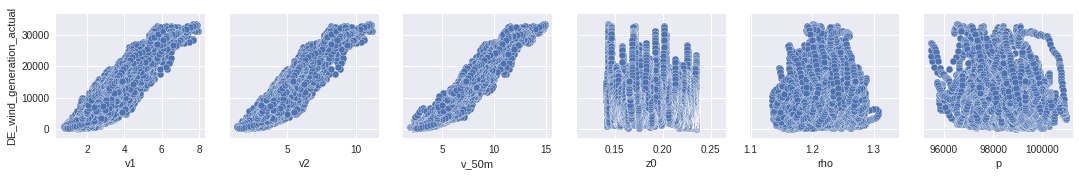

In [27]:
sns.pairplot(df, x_vars = ['v1', 'v2', 'v_50m', 'z0', 'rho', 'p'], y_vars = ['DE_wind_generation_actual'])

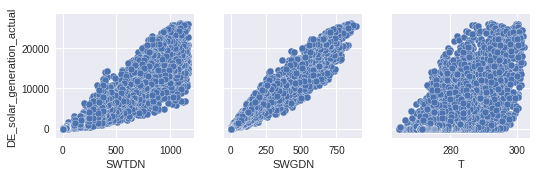

In [28]:
sns.pairplot(df, x_vars = ['SWTDN', 'SWGDN', 'T'], y_vars = ['DE_solar_generation_actual'])

# Machine Learning

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

model = LinearRegression()

xwind = df[['v1', 'v2', 'v_50m', 'z0']]
ywind = df['DE_wind_generation_actual']

xsolar = df[['SWTDN', 'SWGDN', 'T']]
ysolar = df['DE_solar_generation_actual']

windscores = cross_val_score(model, xwind, ywind, cv = 10)
solarscores = cross_val_score(model, xsolar, ysolar, cv = 10)

print('Average score for wind : {}'.format(np.mean(windscores)))
print('Average score for solar : {}'.format(np.mean(solarscores)))
                             


Average score for wind : 0.8596683439671817
Average score for solar : 0.9164919651083119


The score used here to evaluate the performance of the model is the  R². It measures how well the predictions approximate the true values. A value close to 1 means that the regression makes predictions which are close to the true values.

Here, using a very simple model, we get very high scores.